**Import Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

**Data Preprocessing**

In [2]:
diabetes = pd.read_csv('../Navttc/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data = pd.DataFrame(diabetes)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
print(f'Total Rows: {data.shape[0]}\n Total Columns: {data.shape[1]}')

Total Rows: 768
 Total Columns: 9


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.dropna(inplace = True)
data.shape

(768, 9)

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
print('Categorical Features')
data.select_dtypes('object').columns

Categorical Features


Index([], dtype='object')

In [12]:
print('Numerical Features')
data.select_dtypes('float64').columns

Numerical Features


Index(['BMI', 'DiabetesPedigreeFunction'], dtype='object')

In [13]:
print('Categorical Features')
data.select_dtypes('int64').columns

Categorical Features


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'Age', 'Outcome'],
      dtype='object')

In [14]:
# Assuming X is your feature matrix
X_variance = np.var(data, axis=0)

# Print or inspect the variances
print("Variance of each feature:\n",X_variance)


Variance of each feature:
 Pregnancies                    11.339272
Glucose                      1020.917262
BloodPressure                 374.159449
SkinThickness                 254.141900
Insulin                     13263.886875
BMI                            62.079046
DiabetesPedigreeFunction        0.109636
Age                           138.122964
Outcome                         0.227186
dtype: float64


In [15]:
data.shape

(768, 9)

In [16]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

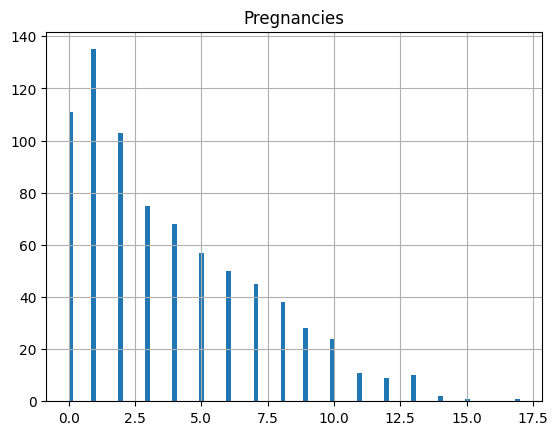

<Figure size 640x480 with 0 Axes>

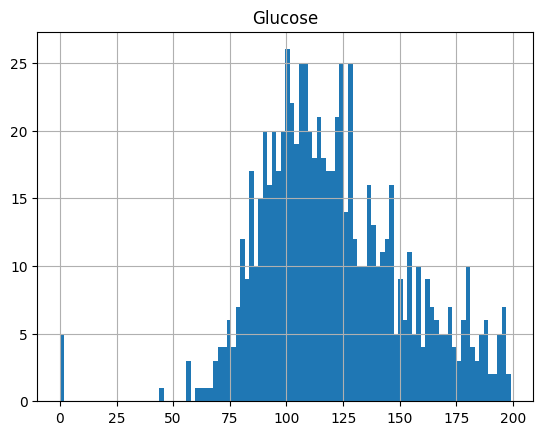

<Figure size 640x480 with 0 Axes>

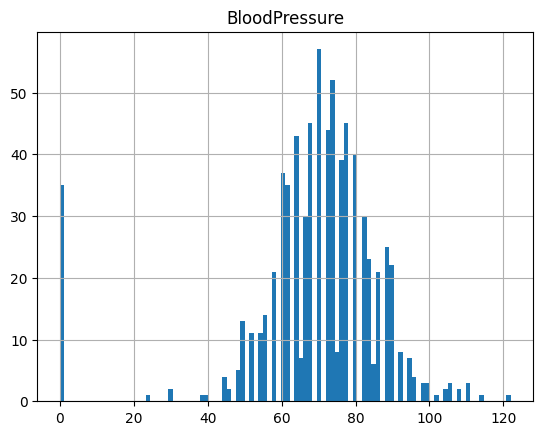

<Figure size 640x480 with 0 Axes>

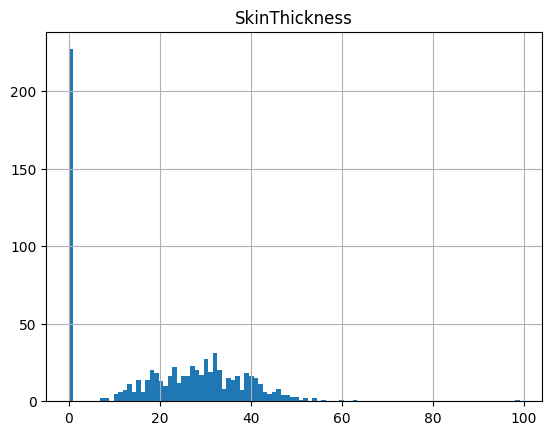

<Figure size 640x480 with 0 Axes>

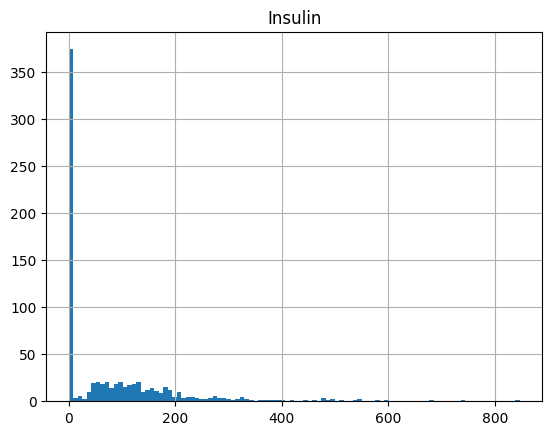

<Figure size 640x480 with 0 Axes>

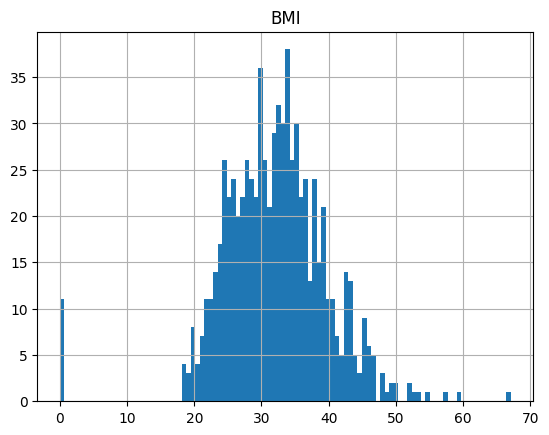

<Figure size 640x480 with 0 Axes>

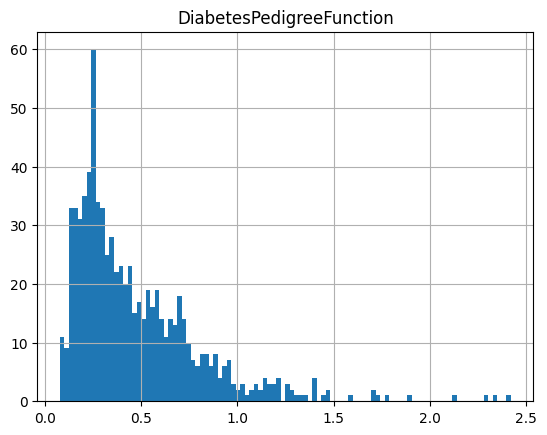

<Figure size 640x480 with 0 Axes>

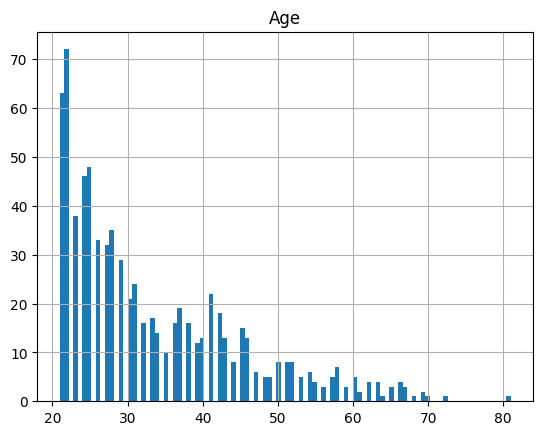

<Figure size 640x480 with 0 Axes>

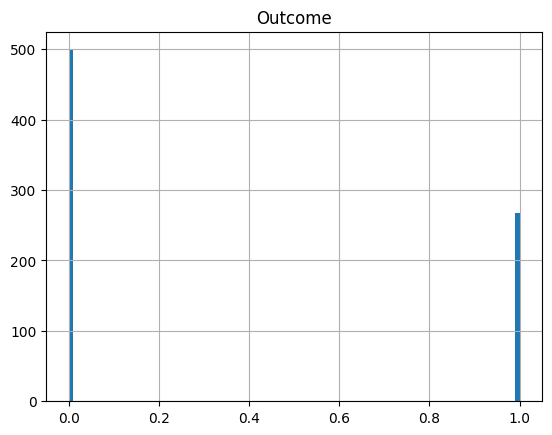

In [17]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for column in columns:
    plt.figure()  # Create a new figure for each histogram
    data.hist(column=column, bins=100)
    plt.savefig(f'{column}_histogram.png')

array([[<Axes: title={'center': 'Outcome'}>]], dtype=object)

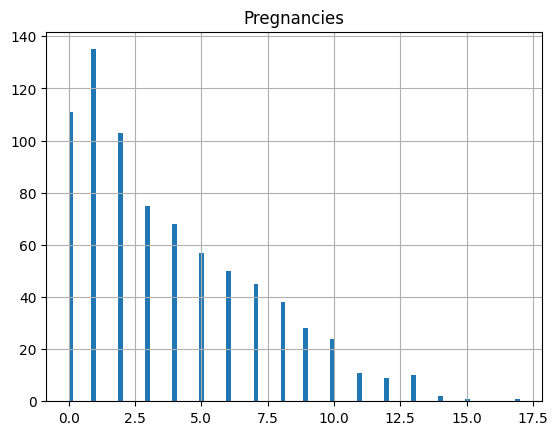

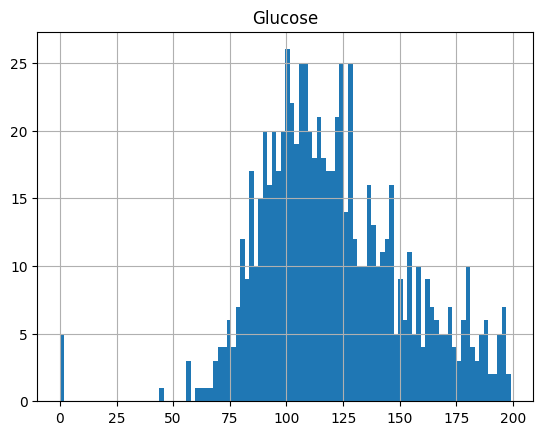

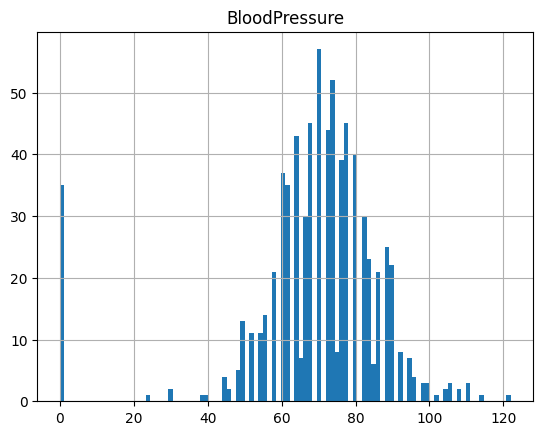

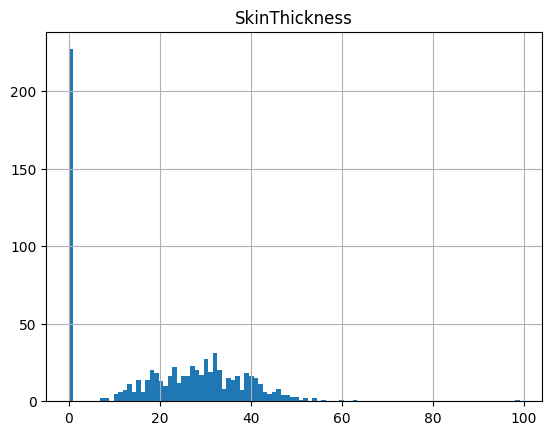

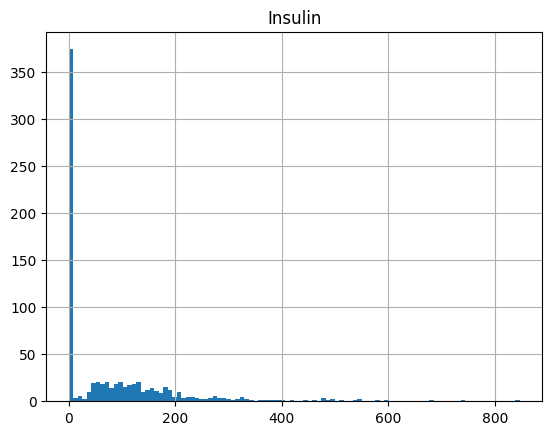

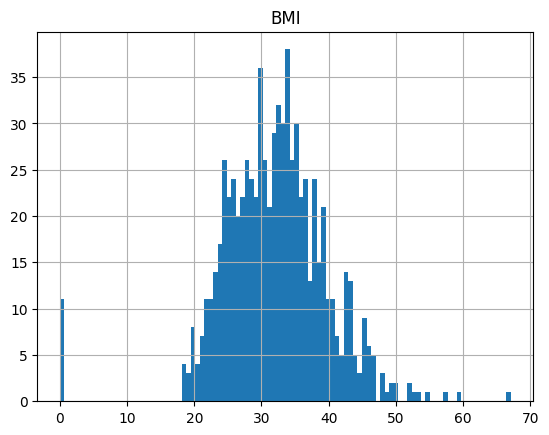

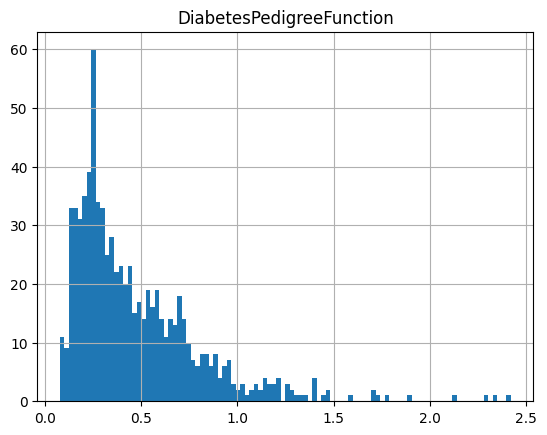

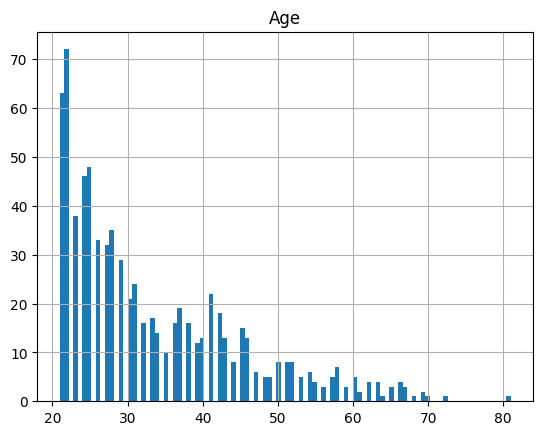

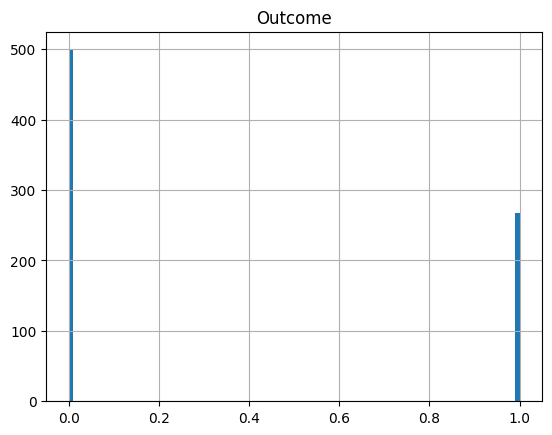

In [17]:

data.hist(column='Pregnancies', bins=100)
data.hist(column='Glucose', bins=100)
data.hist(column='BloodPressure', bins=100)
data.hist(column='SkinThickness', bins=100)
data.hist(column='Insulin', bins=100)
data.hist(column='BMI', bins=100)
data.hist(column='DiabetesPedigreeFunction', bins=100)
data.hist(column='Age', bins=100)
data.hist(column='Outcome', bins=100)


In [18]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y =data['Outcome']

In [19]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**KNN Model**


In [46]:
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 

In [47]:
#create a list to hold the cross-validation (cv) scores
cv_scores =[]
# define the number of folds smaller than the number of observations of data 
folds = 10
# creating odd List of K for KNN to avoid ties in two class problems
ks = list(range(1, int(len(X) * ((folds - 1)/folds))))
#remove all multiples of 3, three classes and multiples of 3 can result in ties 
ks = [k for k in ks if k % 3 != 0]

#perform k-fold cross validation
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    # performs cross-validation and returns the average accuracy 
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy') 
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean) 


1 0.6796650717703349
2 0.7122351332877648
4 0.7187115516062884
5 0.7213773069036227
7 0.7396274777853726
8 0.7383116883116883
10 0.7434723171565277
11 0.7369446343130555
13 0.7422077922077922
14 0.7539131920710869
16 0.7526144907723855
17 0.7552973342447027
19 0.7474709501025291
20 0.7461893369788107
22 0.7501196172248804
23 0.7475222146274778
25 0.7462064251537937
26 0.7331681476418319
28 0.7305365686944635
29 0.7318523581681476
31 0.7344497607655502
32 0.7318523581681476
34 0.7357484620642516
35 0.7422419685577581
37 0.7357313738892687
38 0.7422590567327411
40 0.7383971291866029
41 0.7383629528366371
43 0.7319036226930964
44 0.7280075187969925
46 0.7228127136021874
47 0.7319207108680793
49 0.7319207108680793
50 0.7227956254272043
52 0.7279904306220096
53 0.730604921394395
55 0.7292891319207109
56 0.7279904306220096
58 0.7240943267259057
59 0.7305878332194122
61 0.7357655502392345
62 0.7331852358168148
64 0.7331510594668489
65 0.7357826384142174
67 0.7435577580314423
68 0.734483937115

The optimal number of neighbors is 17


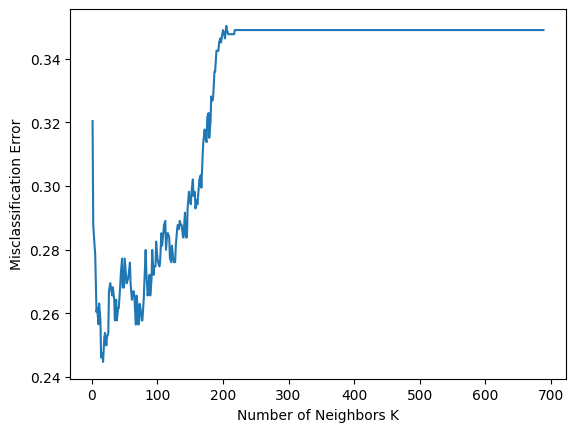

In [48]:
# calculate misclassification error for each k 
MSE = [1 - x for x in cv_scores]
#print(MSE)
#determining best k (min. MSE)
optimal_k= ks [MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")
#plot misclassification error vs k
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K') 
plt.ylabel('Misclassification Error')
plt.show()

In [49]:
n = 17
# Fit KNN classifiers with different values of n_neighbors and calculate accuracy scores
knn = KNeighborsClassifier(n)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [50]:
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
355            9      165             88              0        0  30.4   
534            1       77             56             30       56  33.3   
344            8       95             72              0        0  36.8   
296            2      146             70             38      360  28.0   
462            8       74             70             40       49  35.3   

     DiabetesPedigreeFunction  Age  
668                     0.430   43  
324                     0.148   21  


In [51]:
y_predict = knn.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [52]:
print("Model Accuracy is : ", round(accuracy_score(y_test,y_predict)*100,2))

Model Accuracy is :  77.27


**Support Vector Machine**



In [53]:
model = SVC() #kernel = 'poly', c ='o.1'
model.fit(X_train, y_train)

SVC()

In [54]:
y_predict = model.predict(X_test)

In [55]:
print("Model Accuracy is : ", round(accuracy_score(y_test,y_predict)*100,2))

Model Accuracy is :  76.62
